#  [ 빅콘테스트 퓨쳐스리그-  <span style = 'color:darkorange'>ECO 제주</span> ]
####  <span style = 'color:darkcyan'>제주도! 음식물 쓰레기 멈춰!</span>
### <span style = 'color:darkcyan'>군집분석과 회귀적 피쳐 셀렉션을 활용한 제주도 음식물 쓰레기 배출량 예측</span>
### 팀명: <span style = 'color:darkorange'>한라봉봉</span>
======================================================================================================

## [목차]
### 1. EDA
### 2.  Clustering
1. 7가지 방법으로 clustering
2. 시각화를 바탕으로 최적의 군집 방법론& 군집 수 결정

### 3. Feature Engineering
### 4. Feature Selection

### 5. Modeling
1. ARIMA
2. Linear Regression
3. Machine Learning(XGB, LSTM)
4. Deep Learning(LSTM, GRU)

### 6. Ensemble & 지도 시각화
- Model Ensemble
- 지리 데이터를 활용한 제주시 지도 시각화


## [제출 파일]
- 01.EDA&Clustering
- 02.Feature_Engineering&Selection
- 03.Modeling(ARIMA)
- 04.Modeling(LR)
- 05.Modeling(ML)
- 06.Modeling(DL)
- 07.Ensemble&GEO_Visualization

## [개요]

 본 분석은 제주도 음식물 쓰레기양 예측을 통한 배출량 감소 방안 도출을 목표로 한다. 

 음식물쓰레기 데이터에 대해서 동별 군집분석을 통해 7개의 군집을 형성한 뒤, 2018 ~ 2021년의 제공 데이터를 통해 음식물 쓰레기 배출량에 대한 피쳐를 생성한다. 해당 피쳐에 대해 회귀분석을 진행하여 배출량 예측에 유의한 피쳐를 선정하고 결과를 바탕으로 음식물 쓰레기의 배출 요인을 파악한다. 머신러닝, 딥러닝, 시계열 분석, 회귀분석 모델을 적절하게 활용해 모델 별 예측 결과를 비교하여 모델을 선정한 후, 앙상블을 통해 최종적으로 동별 7-8월 음식물 쓰레기 배출량을 예측한다. 예측을 토대로 시각화 및 배출량 감소 방안을 도출한다. 

 제주광역음식물류 폐기물처리시설 조성사업이 착수됨에 따라 본 공모전의 분석 결과를 기초자료로 활용할 수 있을 것으로 기대된다. 바이오 가스화 시설과 같이 쓰레기의 자원화를 위한 시설 구축, 설치 및 중•장기적 운영 계획 수립에도 기여할 것으로 예상된다. 기존 음식물 쓰레기 종량기를 신용카드 리더기가 탑제된 새 종량기로 교체하는 과정에서 그 우선순위를 선정하는 데에도 도움을 줄 수 있을 것이다. 근본적으로 음식물 쓰레기 발생 요인 분석을 통해 처리 비용 감소 효과를 기대할 수 있다. 또한 본 분석은 음식물 감량기 설치 의무화 대상 및 설치 기간을 재조정함에 있어 기준으로 활용될 것으로 기대된다.


## 1.  EDA

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline
from IPython.display import Image 

# EDA

import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.base import ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import RegressorMixin
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, clear_output
import shap
print(tf.__version__)


# clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

2.2.0


In [2]:
foodwaste=pd.read_csv('01_제공데이터/01_음식물쓰레기_FOOD_WASTE.csv',encoding='cp949')
udongkor=pd.read_csv('01_제공데이터/02-1_내국인유동인구_KOREAN.csv',encoding='cp949')
longtermfrgn=pd.read_csv('01_제공데이터/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv',encoding='cp949')
shorttermfrgn=pd.read_csv('01_제공데이터/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv',encoding='cp949')
residentpop=pd.read_csv('01_제공데이터/03_거주인구_RESIDENT_POP.csv',encoding='cp949')
cardspending=pd.read_csv('01_제공데이터/04_음식관련 카드소비_CARD_SPENDING.csv',encoding='cp949')

# 1.EDA

### (1) 추후 분석에 코로나 데이터를 추가로 사용한 이유

In [8]:
foodwaste['year_month']=foodwaste['base_date'].apply(lambda x: x[:7])
foodwaste['month']=foodwaste['base_date'].apply(lambda x: x[5:7])

In [9]:
foodwaste['yearmonth']=foodwaste['base_date'].apply(lambda x: x[:7])
total=pd.pivot_table(data=foodwaste, columns='emd_nm',index='yearmonth',values='em_g',aggfunc=np.sum)
ss1=total.drop(['구좌읍','조천읍','한경면','한림읍','알수없음'],1).T

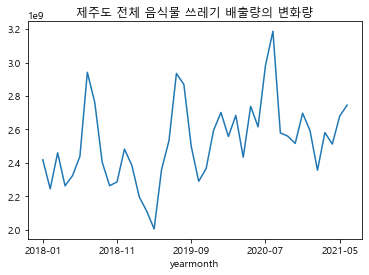

In [10]:
total.sum(axis=1).plot()
plt.title('제주도 전체 음식물 쓰레기 배출량의 변화량')
plt.show()
# 2020년 이후에 음식물쓰레기 배출량이 전년도에 비해 증가하고 있음을 알 수 있음
# 따라서 2020년 이후 급격한 사회 변화를 초래한 코로나가 영향을 끼쳤을 수도 있겠다고 판단
# 코로나와 관련된 외부 데이터를 수집하여 분석에 활용하기로 결정

### (2) 추후 분석에서 시계열 분석을 진행한 이유

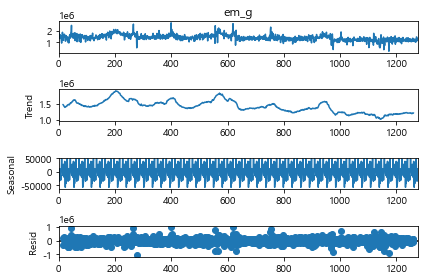

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(foodwaste.query('emd_nm=="건입동"').groupby(['base_date','emd_nm'])[['em_g']].sum().reset_index().em_g,
                            model='additive', period=31)
result.plot()
plt.show()

#임의로 '건입동'을 빼서 원시계열, 트랜드, 계절성, 계절성과 트랜드를 제외한 resid 그래프를 그려본 결과 일정한 패턴 형태를 발견할 수 있음
# 각 데이터의 값이 독립적이지 않다는 것을 나타내므로 이를 보고 arima와 lstm과 같은 시계열 모델 사용의 필요성을 느낌

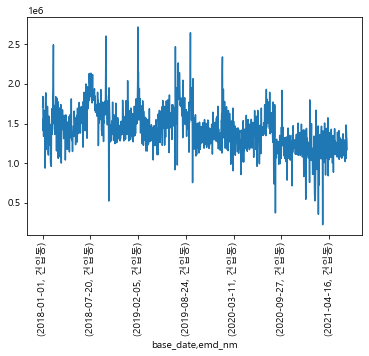

In [12]:
foodwaste.query('emd_nm=="건입동"').groupby(['base_date','emd_nm'])['em_g'].sum().plot()
plt.xticks(rotation = 90)
plt.show()

# 건입동의 원시계열 또한 그래프만 출력해보면 뒤로 갈수록 줄어드는 경향이 있지만 비슷한 패턴이 반복되는 것을 볼 수 있음.


### (3) 추후 분석에 군집분석을 진행한 이유

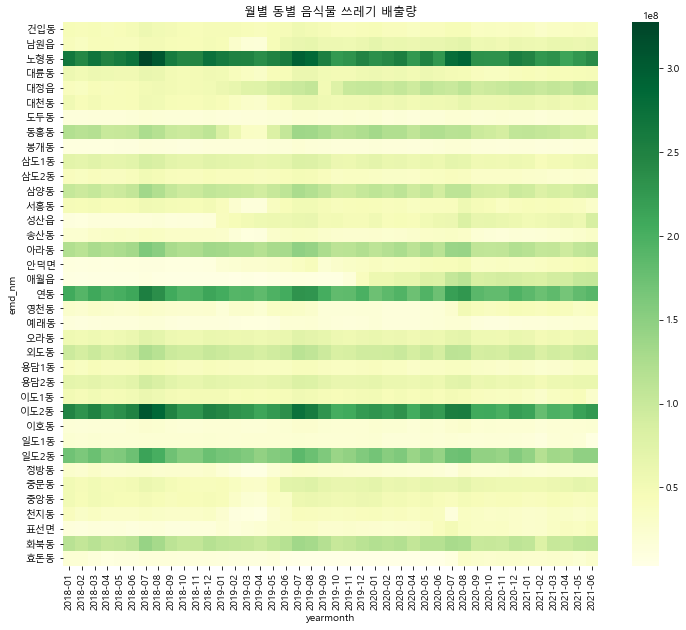

In [13]:
plt.subplots(figsize=(12,10))
sns.heatmap(ss1,cmap='YlGn',)#흰선
plt.title('월별 동별 음식물 쓰레기 배출량')
plt.show()
# 각 동별로 스케일이 상이하기 때문에 군집분석을 이용한다면 스케일의 특성이 담긴 군집들로 나뉘어 분석을 진행할 수 있을 것이라 기대함

In [14]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(ss1.T))
ss1_norm = robustScaler.transform(ss1.T)

RobustScaler()


In [15]:
ss1_norm = pd.DataFrame(ss1_norm, columns = ss1.index, index = ss1.columns)

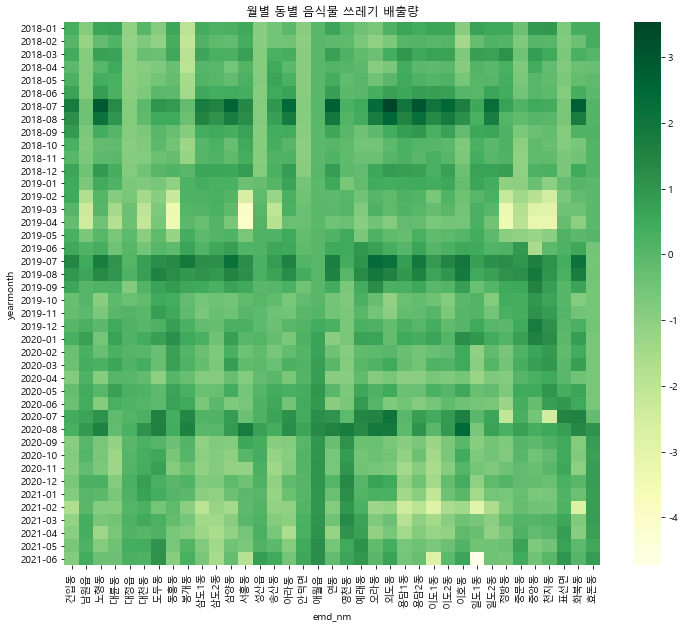

In [16]:
plt.subplots(figsize=(12,10))
sns.heatmap(ss1_norm,cmap='YlGn')#흰선
plt.title('월별 동별 음식물 쓰레기 배출량')
plt.show()
# 각 동별로 음식물 쓰레기 배출량의 분포가 상이함을 알 수 있음
#-> 분포가 비슷한 동들끼리 군집을 형성해 학습의 필요성이 있음

-------------

## 2. Clustering

### 1. 7가지 방법으로 군집 생성
- [군집 No.1](#군집-No.1)
- [군집 No.2](#군집-No.2)
- [군집 No.3](#군집-No.3)
- [군집 No.4](#군집-No.4)
- [군집 No.5](#군집-No.5)
- [군집 No.6](#군집-No.6)
- [군집 No.7](#군집-No.7)
    
### 2. 각 군집별 시각화 
- [각 군집별 시각화 & 비교](#각-군집별-비교)

==================================================================================================================

### 1. 7가지 방법으로 군집 생성

### 군집 No.1

*elbow point를 찾아서 그 point를 적절한 군집 수로 결정하는 방법*

In [1377]:
foodwaste['yearmonth']=foodwaste['base_date'].apply(lambda x: x[:7])
total=pd.pivot_table(data=foodwaste, columns='emd_nm',index='yearmonth',values='em_g',aggfunc=np.sum)
ss1=total.drop(['구좌읍','조천읍','한경면','한림읍','알수없음'],1).T

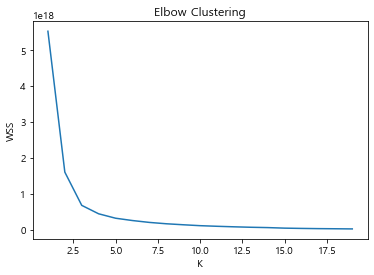

In [1378]:
#Elbow point 확인
wss=[]
for k in np.arange(1,20): #1부터 20까지의 군집 수
    km_k = KMeans(n_clusters=k).fit(ss1)
    wss.append(km_k.inertia_)

plt.plot(np.arange(1,20),wss)
plt.xlabel('K')
plt.ylabel('WSS')
plt.title('Elbow Clustering')
plt.show()

#elbow point(꺾이는 포인트)가 3인 것으로 보임

In [1379]:
# elbow point에 의해 3개 군집으로 clustering
ss1_km=KMeans(n_clusters=3,random_state=10)
km = ss1_km.fit(ss1.iloc[:,:30])

In [1380]:
#군집 별 동 개수 확인
ss1['cluster_km']=km.labels_
ss1['cluster_km']=ss1['cluster_km'].astype('category')

ss1.cluster_km.value_counts()

0    28
2     6
1     3
Name: cluster_km, dtype: int64

In [1381]:
ss1.head()

yearmonth,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,cluster_km
emd_nm,,,,,,,,,,,,,,,,,,,,,
건입동,45646550.0,42953550.0,46422450.0,42438700.0,44893300.0,48187900.0,57478250.0,52553750.0,49888000.0,45417700.0,...,36567550.0,35796000.0,37884150.0,36737750.0,29397850.0,34167750.0,35386850.0,38047500.0,36493300.0,0
남원읍,42437700.0,37088050.0,42988350.0,42703500.0,42616750.0,42287450.0,49758400.0,49571700.0,45419400.0,44434300.0,...,57684950.0,53573900.0,60576700.0,56595100.0,56178800.0,62602150.0,61957700.0,59816600.0,62927050.0,0
노형동,265018400.0,243744900.0,268625650.0,248898350.0,259232500.0,272193365.0,327483750.0,306231800.0,259310550.0,244370750.0,...,232088700.0,231329350.0,255413000.0,247444300.0,227399950.0,232733500.0,212851000.0,227061100.0,239069250.0,1
대륜동,57612600.0,51722150.0,57214850.0,55609050.0,53686150.0,52926700.0,63629950.0,60656200.0,50863500.0,48485050.0,...,37333600.0,36899550.0,42350750.0,44229050.0,41473600.0,45509750.0,44380900.0,46104350.0,46745900.0,0
대정읍,38885550.0,36731400.0,43941150.0,41431100.0,43391800.0,44202200.0,50247200.0,53799900.0,50900300.0,47706650.0,...,96266900.0,100047750.0,107058050.0,105314800.0,99042750.0,105467100.0,101782450.0,113929800.0,109850800.0,0


### 군집 No.2
*Gaussian Clustering*

In [1382]:
ss2 =total.drop(['구좌읍','조천읍','한경면','한림읍','알수없음'],1).T
gmm=GaussianMixture(n_components=3,covariance_type='diag', reg_covar=1e-5).fit(ss2.iloc[:,:30])

In [1383]:
bic=[]
lowest_bic = np.infty
n_components_range = range(1, 7) #1개부터 7개로 군집을 가져봄
cv_types = ['spherical', 'tied', 'diag'] #3가지의 타입, full은 cv가 너무 커서 사용하지 못함
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type,
                             random_state = 1000,
                             reg_covar=1e-5) 
        gmm.fit(ss2.iloc[:,:30])
        bic.append(gmm.bic(ss2.iloc[:,:30]))
        if bic[-1] < lowest_bic:  
            lowest_bic = bic[-1]
            best_gmm = gmm
            print(n_components, cv_type)
print("-------------------------------------------")
print(best_gmm)

1 spherical
2 spherical
3 spherical
4 spherical
5 spherical
6 spherical
1 tied
2 tied
-------------------------------------------
GaussianMixture(covariance_type='tied', n_components=2, random_state=1000,
                reg_covar=1e-05)


In [1384]:
ss2['cluster_gmm']=best_gmm.predict(ss2.iloc[:,:30]) #클러스터링 할당된애들 저장
ss2['cluster_gmm']=ss2['cluster_gmm'].astype('category')

ss2['cluster_gmm'].value_counts()

0    29
1     8
Name: cluster_gmm, dtype: int64

In [1385]:
ss2.head()

yearmonth,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,cluster_gmm
emd_nm,,,,,,,,,,,,,,,,,,,,,
건입동,45646550.0,42953550.0,46422450.0,42438700.0,44893300.0,48187900.0,57478250.0,52553750.0,49888000.0,45417700.0,...,36567550.0,35796000.0,37884150.0,36737750.0,29397850.0,34167750.0,35386850.0,38047500.0,36493300.0,0
남원읍,42437700.0,37088050.0,42988350.0,42703500.0,42616750.0,42287450.0,49758400.0,49571700.0,45419400.0,44434300.0,...,57684950.0,53573900.0,60576700.0,56595100.0,56178800.0,62602150.0,61957700.0,59816600.0,62927050.0,0
노형동,265018400.0,243744900.0,268625650.0,248898350.0,259232500.0,272193365.0,327483750.0,306231800.0,259310550.0,244370750.0,...,232088700.0,231329350.0,255413000.0,247444300.0,227399950.0,232733500.0,212851000.0,227061100.0,239069250.0,1
대륜동,57612600.0,51722150.0,57214850.0,55609050.0,53686150.0,52926700.0,63629950.0,60656200.0,50863500.0,48485050.0,...,37333600.0,36899550.0,42350750.0,44229050.0,41473600.0,45509750.0,44380900.0,46104350.0,46745900.0,0
대정읍,38885550.0,36731400.0,43941150.0,41431100.0,43391800.0,44202200.0,50247200.0,53799900.0,50900300.0,47706650.0,...,96266900.0,100047750.0,107058050.0,105314800.0,99042750.0,105467100.0,101782450.0,113929800.0,109850800.0,0


### 군집 No.3
*elbow 기법의 대안인 silhouette score과 SSE의 차이 비교 방법으로 clustering*

In [1386]:
sy1=total.drop(['구좌읍','조천읍','한경면','한림읍','알수없음'],1).T

In [1387]:
#스케일링 안하고 silhouette score 방법으로 clustering

wss = []
sis = []

for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=2)
    kmeans.fit(sy1)
    wss = np.append(wss, kmeans.inertia_)
    sis = np.append(sis, silhouette_score(sy1, kmeans.labels_))


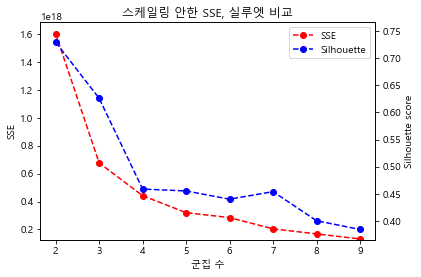

In [1388]:
# 군집 수에 따른 SSE와 Silhouette score 시각화
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #X축 공유해서 두 장이 합쳐진다.

line1 = ax1.plot(np.arange(2,10), wss, 'ro--', label='SSE')
line2 = ax2.plot(np.arange(2,10), sis, 'bo--', label='Silhouette') 

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05)
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05)

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('스케일링 안한 SSE, 실루엣 비교')
plt.legend(lines, labels)
plt.show()

#k=4가 적절

In [1389]:
sy1_km=KMeans(n_clusters=6)
km = sy1_km.fit(sy1)

In [1390]:
sy1['cluster_km']=km.labels_
sy1['cluster_km']=sy1['cluster_km'].astype('category')

sy1.cluster_km.value_counts()

0    12
4    11
2     5
3     5
1     2
5     2
Name: cluster_km, dtype: int64

In [1391]:
sy1.head()

yearmonth,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,cluster_km
emd_nm,,,,,,,,,,,,,,,,,,,,,
건입동,45646550.0,42953550.0,46422450.0,42438700.0,44893300.0,48187900.0,57478250.0,52553750.0,49888000.0,45417700.0,...,36567550.0,35796000.0,37884150.0,36737750.0,29397850.0,34167750.0,35386850.0,38047500.0,36493300.0,4
남원읍,42437700.0,37088050.0,42988350.0,42703500.0,42616750.0,42287450.0,49758400.0,49571700.0,45419400.0,44434300.0,...,57684950.0,53573900.0,60576700.0,56595100.0,56178800.0,62602150.0,61957700.0,59816600.0,62927050.0,4
노형동,265018400.0,243744900.0,268625650.0,248898350.0,259232500.0,272193365.0,327483750.0,306231800.0,259310550.0,244370750.0,...,232088700.0,231329350.0,255413000.0,247444300.0,227399950.0,232733500.0,212851000.0,227061100.0,239069250.0,1
대륜동,57612600.0,51722150.0,57214850.0,55609050.0,53686150.0,52926700.0,63629950.0,60656200.0,50863500.0,48485050.0,...,37333600.0,36899550.0,42350750.0,44229050.0,41473600.0,45509750.0,44380900.0,46104350.0,46745900.0,4
대정읍,38885550.0,36731400.0,43941150.0,41431100.0,43391800.0,44202200.0,50247200.0,53799900.0,50900300.0,47706650.0,...,96266900.0,100047750.0,107058050.0,105314800.0,99042750.0,105467100.0,101782450.0,113929800.0,109850800.0,2


### 군집 No.4
*Robust Scaler 을 사용하여 silhouette score clustering*

In [1392]:
sy2=total.drop(['구좌읍','조천읍','한경면','한림읍','알수없음'],1).T

In [1393]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(sy2))
sy1_norm = robustScaler.transform(sy2)

RobustScaler()


In [1394]:
sy1_norm = pd.DataFrame(sy1_norm, columns = sy2.columns, index = sy2.index)

In [1395]:
#Robust Scaling
wssn = []
sisn = []
for k in range(2,10):
    kmeansn = KMeans(n_clusters=k, random_state=2)
    kmeansn.fit(sy1_norm)
    wssn = np.append(wssn, kmeansn.inertia_)
    sisn = np.append(sisn, silhouette_score(sy1_norm, kmeansn.labels_))

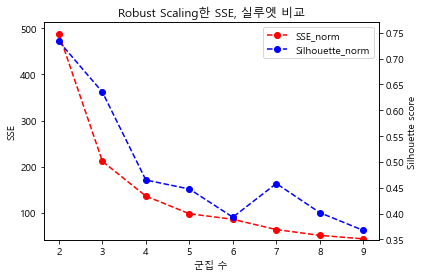

In [1396]:
# 군집 수에 따른 SSE와 Silhouette score 시각화
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #X축 공유해서 두 장이 합쳐진다.

line1 = ax1.plot(np.arange(2,10), wssn, 'ro--', label='SSE_norm')
line2 = ax2.plot(np.arange(2,10), sisn, 'bo--', label='Silhouette_norm') 

ax1.set_ylim(wssn.min()*0.95, wssn.max()*1.05)
ax2.set_ylim(sisn.min()*0.95, sisn.max()*1.05)

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('Robust Scaling한 SSE, 실루엣 비교')
plt.legend(lines, labels)
plt.show()

# k = 6이 가장 적절해보임

In [1397]:
sy2_km=KMeans(n_clusters=6)
km = sy2_km.fit(sy1_norm)

In [1398]:
sy1_norm['cluster_km']=km.labels_
sy1_norm['cluster_km']=sy1_norm['cluster_km'].astype('category')

sy1_norm.cluster_km.value_counts()

0    13
3    12
2     5
4     3
1     2
5     2
Name: cluster_km, dtype: int64

In [1399]:
sy2 = sy1_norm
sy2.head()

yearmonth,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,cluster_km
emd_nm,,,,,,,,,,,,,,,,,,,,,
건입동,0.000000,0.000000,0.000000,-0.005624,0.021913,0.058875,0.085400,0.005483,0.081472,0.025231,...,-0.116002,-0.124074,-0.111331,-0.111675,-0.243448,-0.178849,-0.146578,-0.121766,-0.154395,0
남원읍,-0.064466,-0.119367,-0.065978,0.000000,-0.025012,-0.052853,-0.033000,-0.043241,-0.004968,0.004190,...,0.250625,0.181552,0.222894,0.184344,0.254594,0.269525,0.286453,0.207238,0.243674,0
노형동,4.407177,4.086258,4.269124,4.379181,4.439866,4.300531,4.226503,4.150352,4.132519,4.282223,...,3.278507,3.237407,3.092522,3.029379,3.438766,2.952276,2.745599,2.734868,2.896222,5
대륜동,0.240398,0.178448,0.207351,0.274089,0.203151,0.148607,0.179749,0.137869,0.100342,0.090863,...,-0.102702,-0.105103,-0.045545,0.000000,-0.018877,0.000000,0.000000,0.000000,0.000000,0
대정읍,-0.135828,-0.126626,-0.047672,-0.027023,-0.009036,-0.016596,-0.025503,0.025844,0.101053,0.074208,...,0.920459,0.980500,0.907490,0.910620,1.051728,0.945450,0.935487,1.025072,0.950305,4


In [1400]:
for i in range(0,6) :
    print( i , sy2.reset_index().query('cluster_km == @i ').emd_nm )
    print('==============================')

0 0      건입동
1      남원읍
3      대륜동
5      대천동
9     삼도1동
10    삼도2동
12     서홍동
21     오라동
23    용담1동
24    용담2동
25    이도1동
31     중문동
32     중앙동
Name: emd_nm, dtype: object
1 18      연동
29    일도2동
Name: emd_nm, dtype: object
2 7     동홍동
11    삼양동
15    아라동
22    외도동
35    화북동
Name: emd_nm, dtype: object
3 6      도두동
8      봉개동
14     송산동
16     안덕면
19     영천동
20     예래동
27     이호동
28    일도1동
30     정방동
33     천지동
34     표선면
36     효돈동
Name: emd_nm, dtype: object
4 4     대정읍
13    성산읍
17    애월읍
Name: emd_nm, dtype: object
5 2      노형동
26    이도2동
Name: emd_nm, dtype: object


### 군집 No.5
*기본적인 feature을 생성하고 Standard Scaler 을 사용하여 silhouette score clustering*

In [1401]:
foodwaste=pd.read_csv('01_제공데이터/01_음식물쓰레기_FOOD_WASTE.csv',encoding='cp949')
foodwaste['year_month'] = foodwaste['base_date'].apply(lambda x : x[:7])
foodwaste['base_date']=pd.to_datetime(foodwaste['base_date'])
foodwaste['day'] = foodwaste['base_date'].dt.dayofweek
foodwaste['month'] = foodwaste['base_date'].dt.month
foodwaste['year'] = foodwaste['base_date'].dt.year
foodwaste['week'] = foodwaste['base_date'].dt.weekofyear
df = foodwaste.query(" emd_nm not in ['구좌읍', '조천읍', '한경면' ,'한림읍', '알수없음']")

In [1402]:
clu = []

f = df.groupby('emd_nm')['em_cnt'].agg([('총배출건수', np.sum),
                                            ('평균배출건수', lambda x : np.round(np.mean(x)))]).reset_index()
clu.append(f)

f = df.groupby('emd_nm')['em_g'].agg([('총배출량', np.sum),
                                            ('평균배출량', lambda x : np.round(np.mean(x)))]).reset_index()
clu.append(f)


f = df.groupby('emd_nm')['pay_amt'].agg([('총지불금액 ', np.sum),
                                            ('평균지불금액 ', lambda x : np.round(np.mean(x)))]).reset_index()
clu.append(f)

cluster = pd.DataFrame({'emd_nm': df['emd_nm'].unique()})
for f in clu :
    cluster = pd.merge(cluster, f, how='left',on='emd_nm')

In [1403]:
from sklearn.preprocessing import StandardScaler
y = cluster['emd_nm']
X = cluster.drop('emd_nm', axis=1)

X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
sy3 = pd.concat( [y , X_scaled] , axis = 1 )

In [1404]:
sy3_km=KMeans(n_clusters=3)
km = sy3_km.fit(X_scaled)

In [1405]:
sy3['cluster_km']=km.labels_
sy3['cluster_km']=sy3['cluster_km'].astype('category')

sy3.cluster_km.value_counts()

1    32
0     4
2     1
Name: cluster_km, dtype: int64

In [1406]:
sy3.head()

,emd_nm,총배출건수,평균배출건수,총배출량,평균배출량,총지불금액,평균지불금액,cluster_km
0,외도동,0.594247,0.221923,0.512680,-0.176957,0.513280,-0.179285,1
1,아라동,1.034689,-0.277886,0.961651,-0.421153,0.957419,-0.426871,1
2,노형동,3.201115,0.436126,3.189171,-0.068700,3.189422,-0.071748,0
3,도두동,-0.737587,-0.920496,-0.840522,-0.668416,-0.843618,-0.673207,1
4,오라동,-0.043421,-0.706293,-0.119001,-0.638485,-0.125031,-0.645698,1


### 군집 No.6 
*군집 No.5와 동일 feature 사용하고 Robust Scaler 을 사용하여 silhouette score clustering*

In [1407]:
X_scaled = RobustScaler().fit_transform(X)   
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

In [1408]:
jh1 = pd.DataFrame(data=X_scaled, columns=['총배출량', '총배출건수'])
jh1 = pd.concat([jh1 , y] , axis = 1 )

In [1409]:
jh1_km = KMeans(n_clusters=5, max_iter=100, random_state=0)
kmeans = jh1_km.fit_predict(X_scaled)
jh1['kmeans'] = kmeans
jh1['kmeans']=jh1['kmeans'].astype('category')
jh1.kmeans.value_counts()

4    15
0    10
3     7
2     4
1     1
Name: kmeans, dtype: int64

In [1410]:
jh1.head()

,총배출량,총배출건수,emd_nm,kmeans
0,0.954084,1.164766,외도동,3
1,1.444747,1.696751,아라동,3
2,3.879115,4.313450,노형동,2
3,-0.524776,-0.443878,도두동,4
4,0.263745,0.394564,오라동,4


### 군집 No.7
*Robust Scaler을 사용하여 linkage, Dbscan, Mean shift 방법으로 시각화하여 군집 생성*

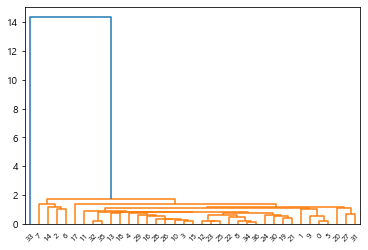

In [1411]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

clust_single = linkage(X_scaled, method='single')

dendrogram(clust_single)
plt.show()

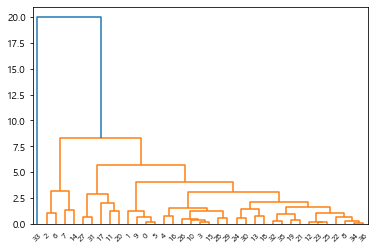

In [1412]:
clust_complete = linkage(X_scaled, method='complete')

dendrogram(clust_complete)
plt.show()

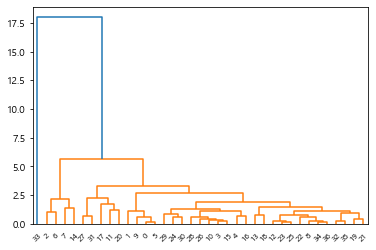

In [1413]:
clust_avg = linkage(X_scaled, method='average')

dendrogram(clust_avg)
plt.show()

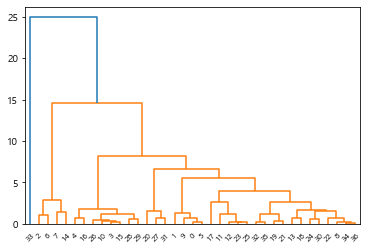

In [1414]:
clust_ward = linkage(X_scaled, method='ward')

dendrogram(clust_ward)
plt.show()

In [1415]:
#cluster plot을 시각화하는 함수 생성

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['총배출량'], y=label_cluster['총배출량'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='best'
    else: legend_loc='best'
    
    plt.legend(loc=legend_loc)
    plt.show()

    
clusterDF = pd.DataFrame(data=X_scaled, columns=[' 총배출량', '총배출량'])
clusterDF = pd.concat([clusterDF , y] , axis = 1 )

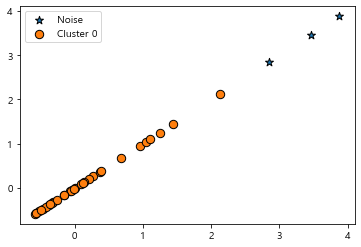

In [1416]:
# dbscan
dbscan = DBSCAN(eps=2.5, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_scaled)
clusterDF['dbscan'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan' , iscenter=False)

#군집화가 진행되지 않음

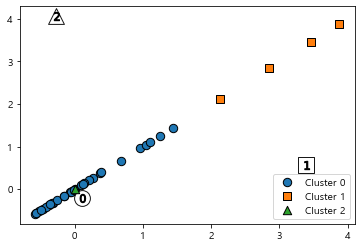

In [1417]:
# mean shift
meanshift = MeanShift(bandwidth=2.6)
meanshift_labels = meanshift.fit_predict(X_scaled)
clusterDF['meanshift'] = meanshift_labels

visualize_cluster_plot(meanshift, clusterDF, 'meanshift', iscenter=True)

#군집 수 = 3

# 각 군집별 비교
- 군집별로 클러스터 plot, 합계 비교 등으로 시각화하고 이를 비교한다.
- 시각화를 통해 시각적으로 뚜렷하게 군집을 구분짓는다고 판단되는 방법론과 이때의 적절한 군집 수를 결정한다.

### 시각화에 필요한 함수 생성

In [1418]:
ss1 = ss1.rename(columns = {'cluster_km' : 'cluster'}) 
ss2 = ss2.rename(columns = {'cluster_gmm' : 'cluster'}) 
sy1 = sy1.rename(columns = {'cluster_km' : 'cluster'}) 
sy2 = sy2.rename(columns = {'cluster_km' : 'cluster'}) 
sy3 = sy3.rename(columns = {'cluster_km' : 'cluster'}) 
jh1 = jh1.rename(columns = {'kmeans' : 'cluster'}) 

In [1419]:
#평균 추세 비교 함수

def cluster_visualization(c):
    print('cluster number: {}'.format(c))
    n=foodwasted.query('cluster==@c')['emd_nm'].nunique()

    fig, axes= plt.subplots((n//4)+1,4,figsize=(20,((n//4)+1)*7),squeeze=False)
    plt.subplots_adjust(hspace=0.35)
    l=foodwasted.query('cluster==@c')['emd_nm'].unique()
    
    if n == 1:
        emd=l[0]
        em=foodwasted.query('emd_nm==@emd and cluster==@c').resample('M')['em_g'].agg(np.mean)
        me=foodwasted.resample('M')['em_g'].agg(np.mean)
        #roll5=em.rolling(3,center=True)
        em.plot()
        me.plot()
        plt.title(emd,fontsize=20)
    
    else:
        for i in range((n//4)+1):
            if i < n//4:
                for j in range(4):
                    emd=l[i*4+j]
                    em=foodwasted.query('emd_nm==@emd and cluster==@c').resample('M')['em_g'].agg(np.mean)
                    me=foodwasted.resample('M')['em_g'].agg(np.mean)
                    #roll5=em.rolling(3,center=True)
                    axes[i][j].plot(em)
                    me.plot(ax=axes[i][j])
                    axes[i][j].set_title(emd,fontsize=20)
            else:
                for j in range(n%4):
                    emd=l[i*4+j]
                    em=foodwasted.query('emd_nm==@emd and cluster==@c').resample('M')['em_g'].agg(np.mean)
                    me=foodwasted.resample('M')['em_g'].agg(np.mean)
                    #roll5=em.rolling(3,center=True)
                    axes[i][j].plot(em)
                    me.plot(ax=axes[i][j])
                    axes[i][j].set_title(emd,fontsize=21)
    plt.show()

In [1420]:
# x축은 총배출량, y축은 총배출건수로 한 scatter plot 그래프 함수

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','v']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['총배출량'], y=label_cluster['총배출건수'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='best'
    else: legend_loc='best'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [1421]:
sumDF = foodwaste.groupby('emd_nm').agg({'em_cnt': np.sum, 'em_g': np.sum}).rename(columns={'em_cnt':'총배출건수', 'em_g':'총배출량'}).reset_index()

In [1422]:
#시계열분해 함수
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal(DF, c):
    print('cluster number: {}'.format(c))
    col_nm = DF.query('cluster==@c').T.iloc[:-1,:].columns
    n=len(col_nm)
    
    for i in range(n):
        result = seasonal_decompose(DF.query('cluster==@c').T.reset_index(drop=True).iloc[:-1,i], model='additive',period=12)
        result.plot()
    plt.show()

### 군집 No.1 시각화

- 합계 비교

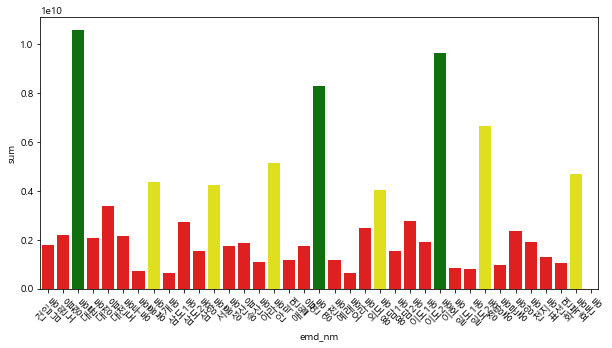

In [1423]:
ss1_pivot = ss1
ss1_pivot['sum']=ss1_pivot[:-1].sum(axis=1)
fig,axes=plt.subplots(figsize=(10,5))
clrs = ['red' if (i==0) else 'green' if (i==1) else 'yellow' for i in ss1_pivot.cluster]
ax=sns.barplot(x=ss1_pivot.index,y=ss1_pivot['sum'],palette=clrs)
plt.xticks(rotation=45)

plt.show()

- 클러스터 plot

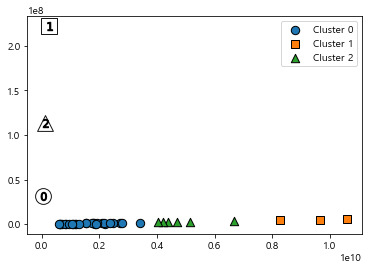

In [1424]:
ss1_sumDF = sumDF.merge(ss1.reset_index()[['emd_nm','cluster']], on='emd_nm')
visualize_cluster_plot(ss1_km, ss1_sumDF, 'cluster', iscenter=True)

## 군집 No.2 시각화

-  합계 비교

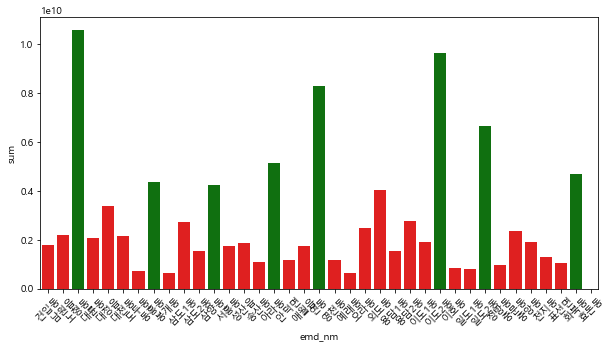

In [1425]:
ss2_pivot = ss2
ss2_pivot['sum']=ss2_pivot[:-1].sum(axis=1)
fig,axes=plt.subplots(figsize=(10,5))
clrs = ['red' if (i==0) else 'green' if (i==1) else 'yellow' if (i==2) else 'blue' if (i==3) else 'black' for i in ss2_pivot.cluster]
ax=sns.barplot(x=ss2_pivot.index,y=ss2_pivot['sum'],palette=clrs)
plt.xticks(rotation=45)

plt.show()

### 군집 No.3 시각화

- 합계 비교

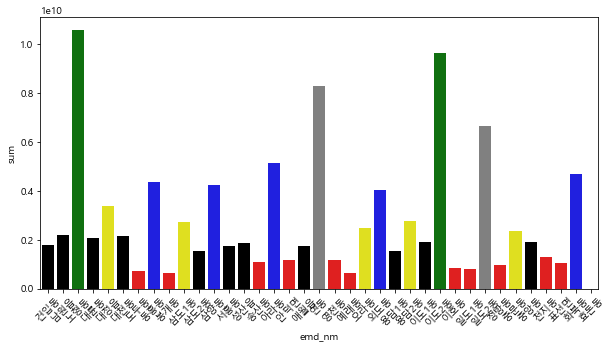

In [1426]:
sy1_pivot = sy1
sy1_pivot['sum']=sy1_pivot[:-1].sum(axis=1)
fig,axes=plt.subplots(figsize=(10,5))
clrs = ['red' if (i==0) else 'green' if (i==1) else 'yellow' if (i==2) else 'blue' if (i==3) else 'black' if (i==4) else 'grey' for i in sy1_pivot.cluster]
ax=sns.barplot(x=sy1_pivot.index,y=sy1_pivot['sum'],palette=clrs)
plt.xticks(rotation=45)

plt.show()

- 클러스터 plot

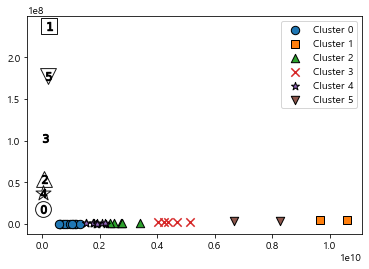

In [1427]:
sy1_sumDF = sumDF.merge(sy1.reset_index()[['emd_nm','cluster']], on='emd_nm')
visualize_cluster_plot(sy1_km, sy1_sumDF, 'cluster', iscenter=True)

### 군집 No.4 시각화

- 동별 평균 추세 확인

In [1428]:
sy2.cluster.value_counts()

0    13
3    12
2     5
4     3
1     2
5     2
Name: cluster, dtype: int64

cluster number: 0


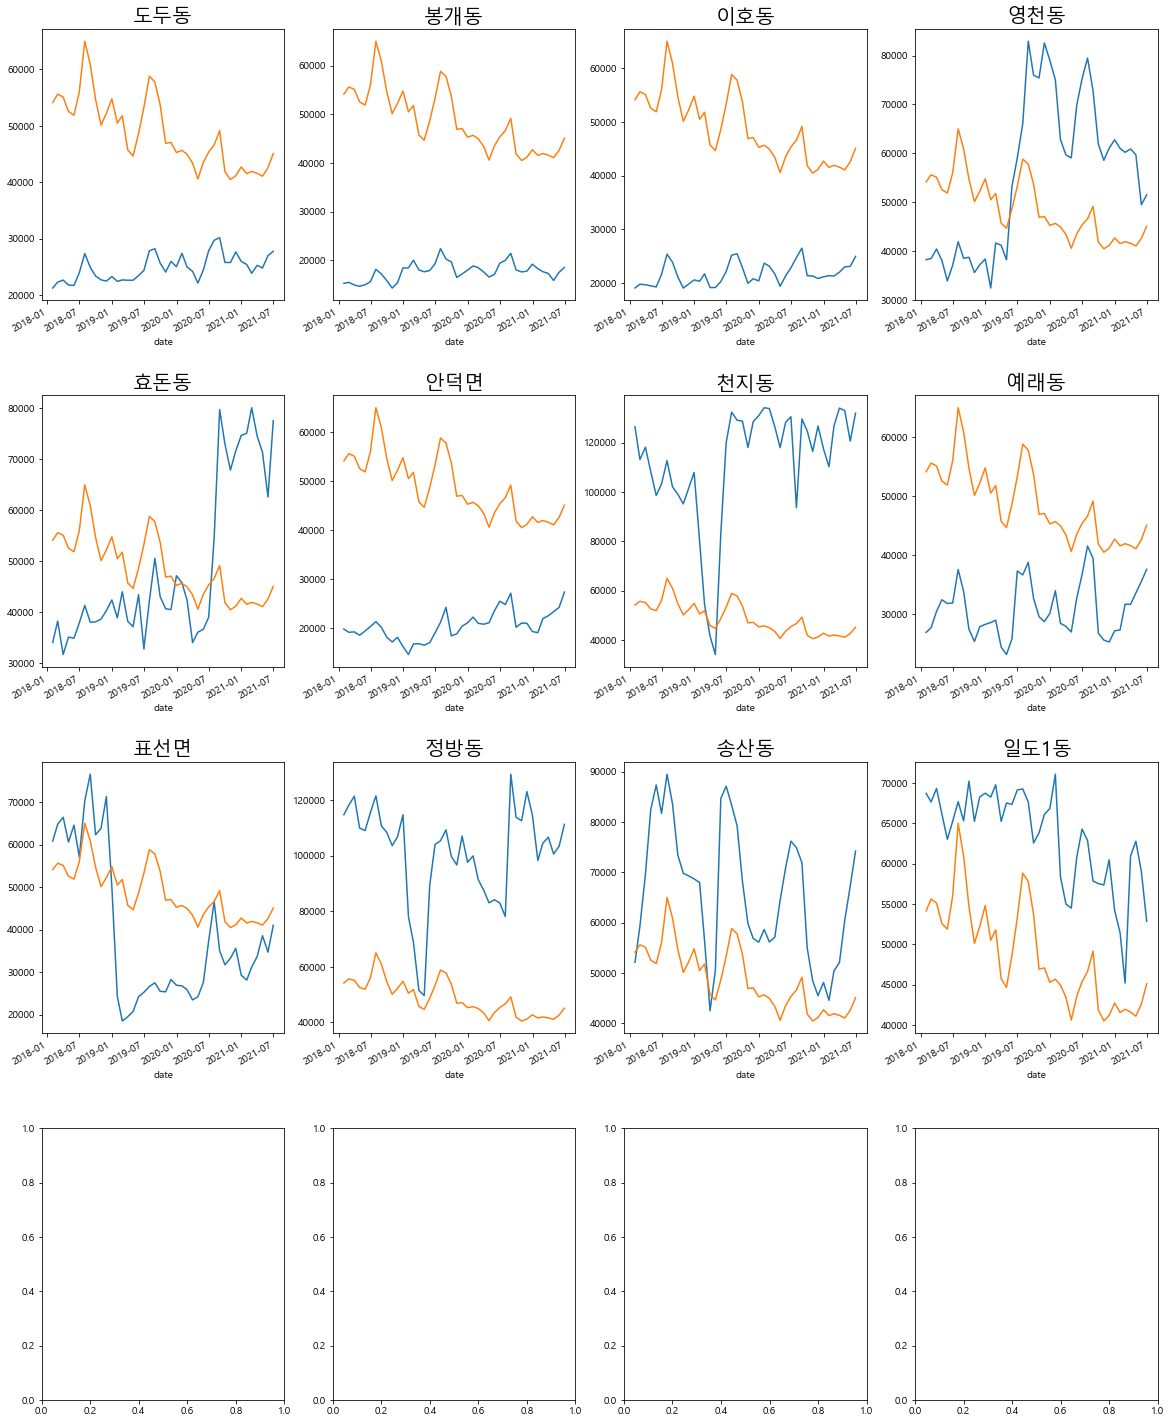

In [1429]:
cluster_visualization(0)

cluster number: 1


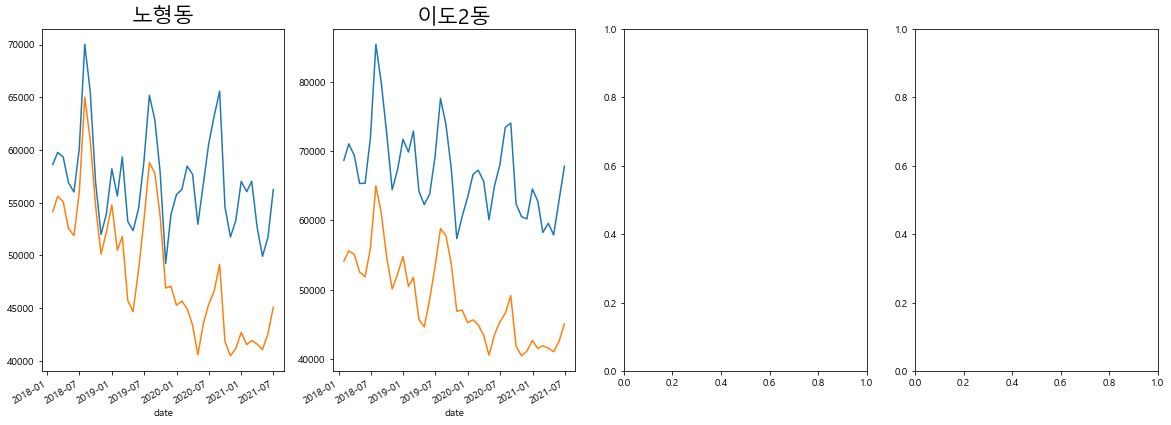

In [1430]:
cluster_visualization(1)

cluster number: 2


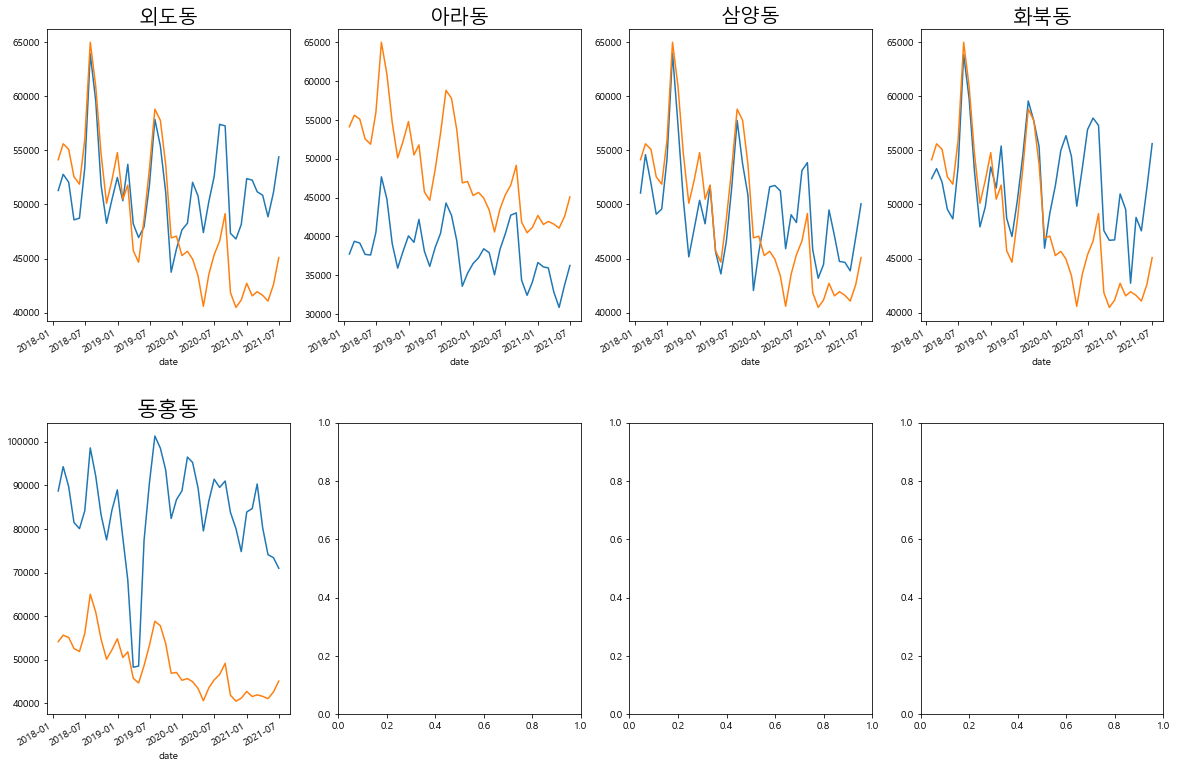

In [1431]:
cluster_visualization(2)

cluster number: 3


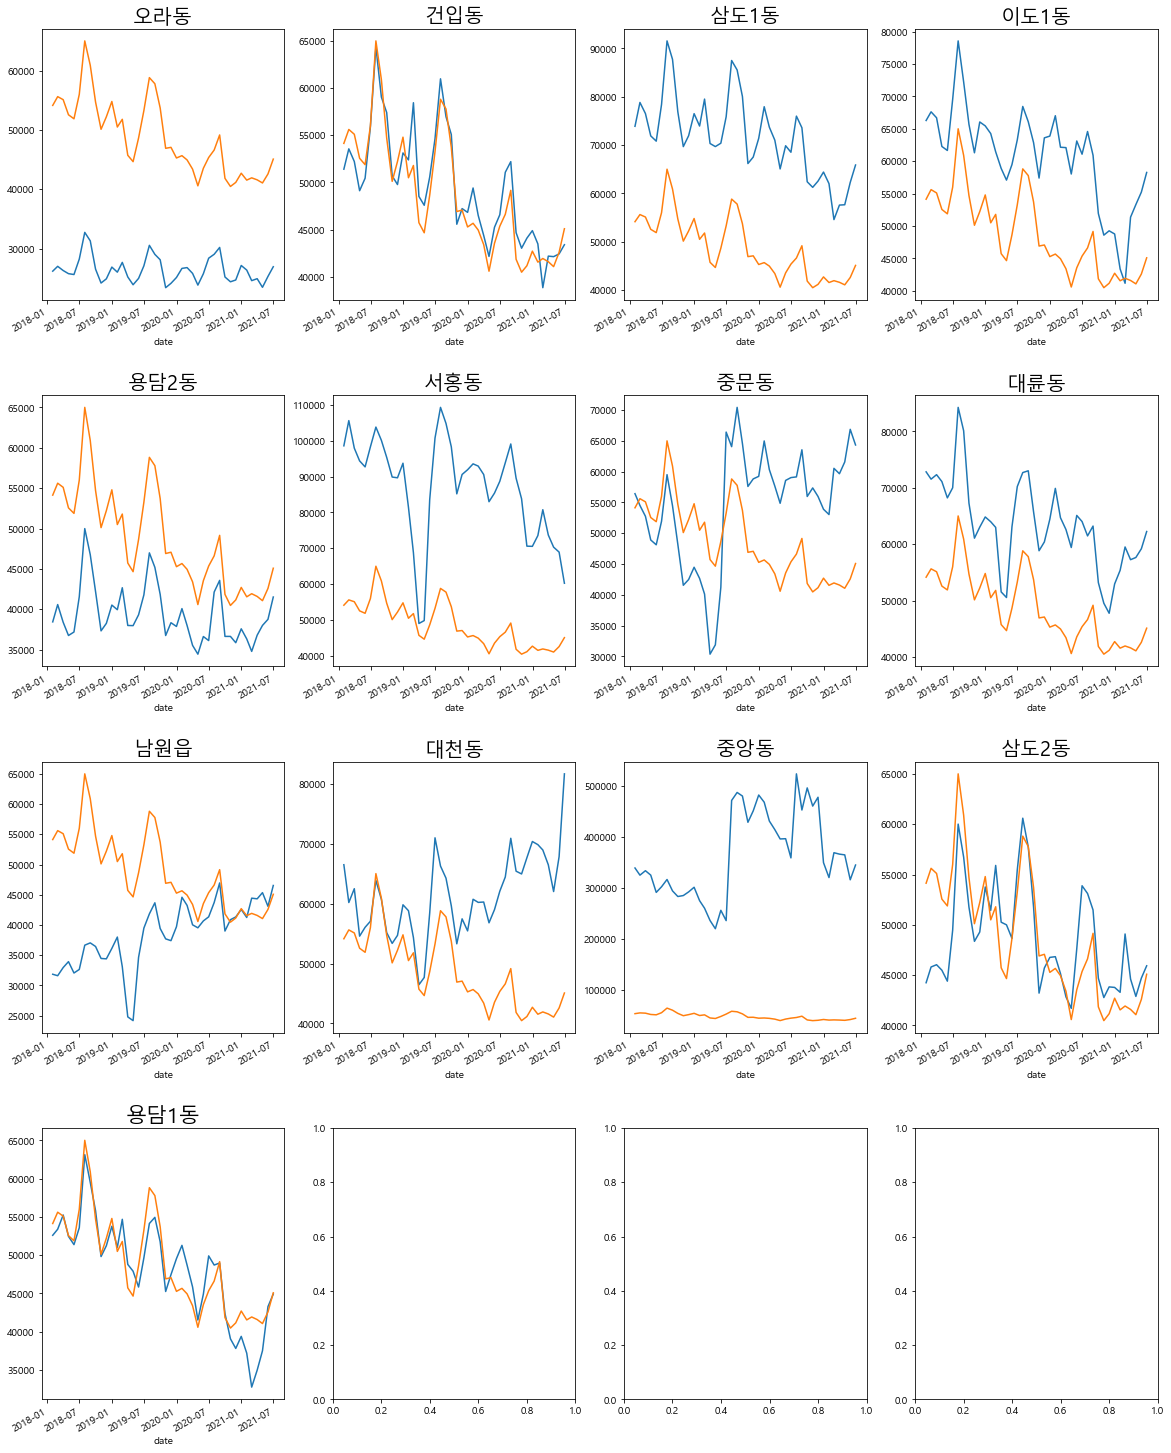

In [1432]:
cluster_visualization(3)

cluster number: 4


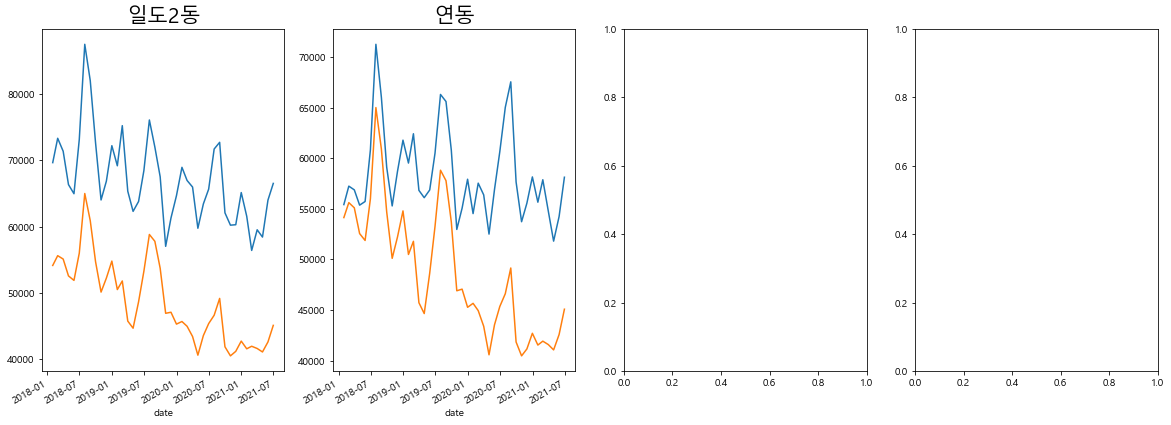

In [1433]:
cluster_visualization(4)

cluster number: 5


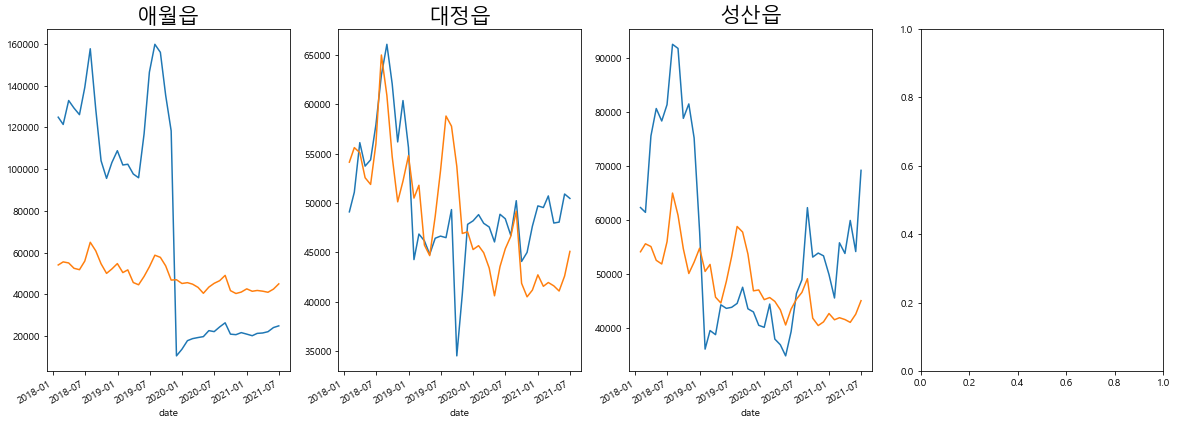

In [1434]:
cluster_visualization(5)

- 합계 비교

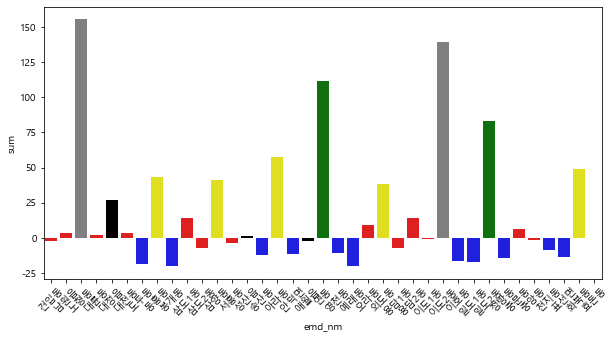

In [1435]:
sy2_pivot = sy2
sy2_pivot['sum']=sy2_pivot[:-1].sum(axis=1)
fig,axes=plt.subplots(figsize=(10,5))
clrs = ['red' if (i==0) else 'green' if (i==1) else 'yellow' if (i==2) else 'blue' if (i==3) else 'black' if (i==4) else 'grey' for i in sy2_pivot.cluster]
ax=sns.barplot(x=sy2_pivot.index,y=sy2_pivot['sum'],palette=clrs)
plt.xticks(rotation=45)

plt.show()

#이 그래프가 다른 합계 비교 그래프와 비교하였을 때 군집을 가장 잘 표현하는 것으로 보임

- 클러스터 plot

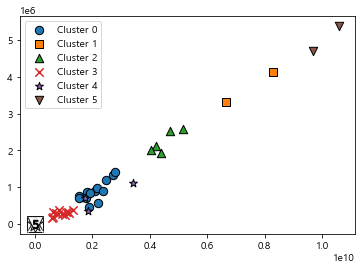

In [1436]:
sy2_sumDF = sumDF.merge(sy2.reset_index()[['emd_nm','cluster']], on='emd_nm')
visualize_cluster_plot(sy2_km, sy2_sumDF, 'cluster', iscenter=True)

- 시계열 분해

cluster number: 0


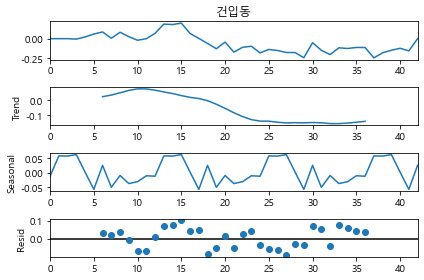

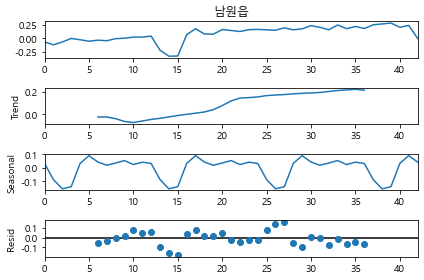

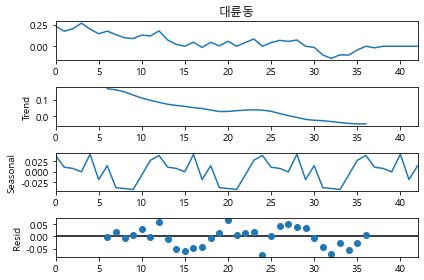

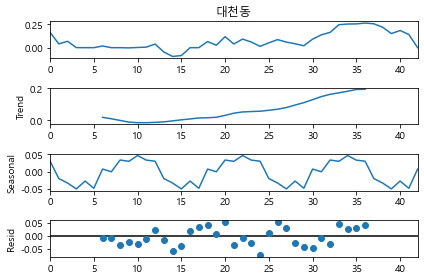

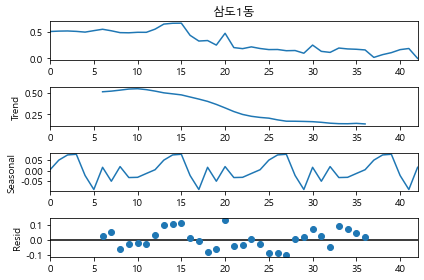

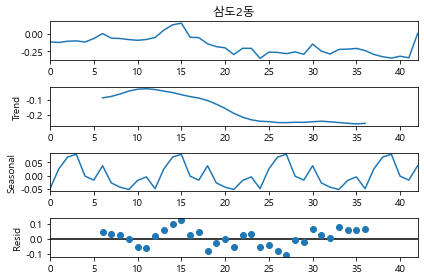

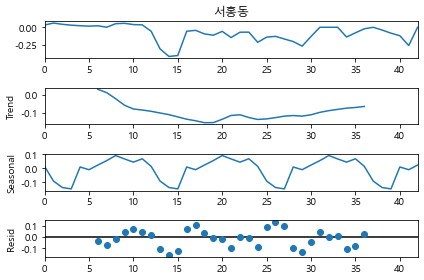

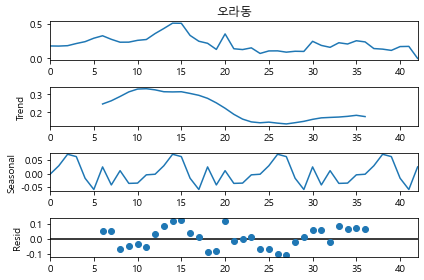

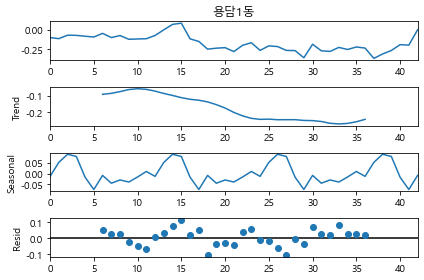

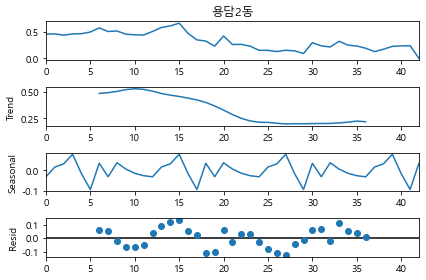

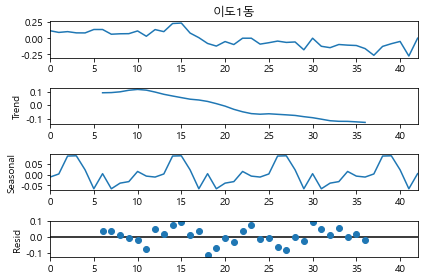

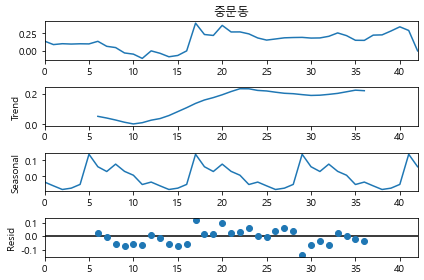

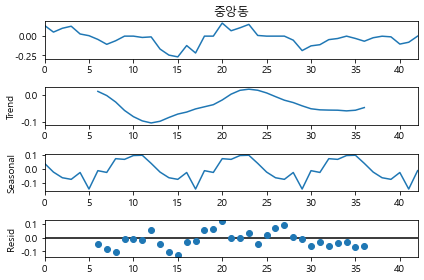

In [1437]:
seasonal(sy2, 0)

cluster number: 1


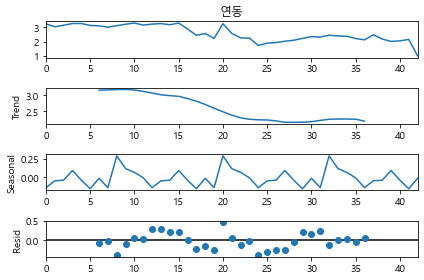

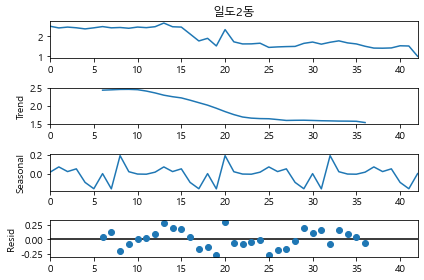

In [1438]:
seasonal(sy2, 1)

cluster number: 2


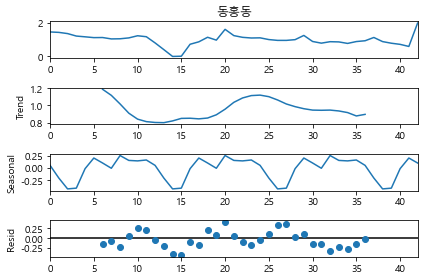

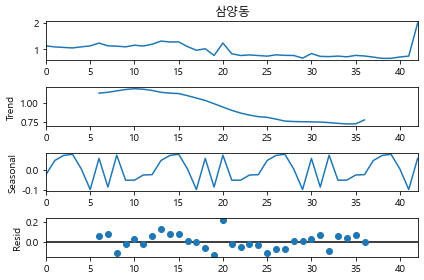

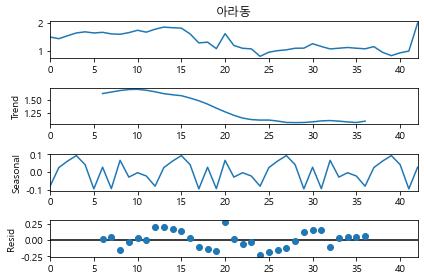

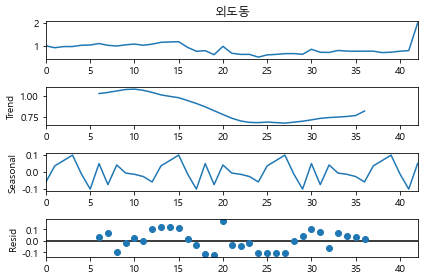

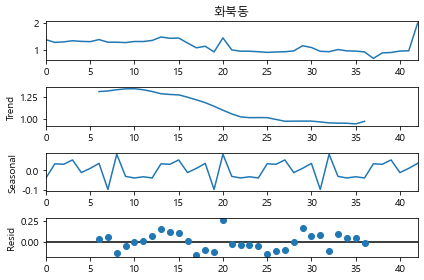

In [1439]:
seasonal(sy2, 2)

cluster number: 3


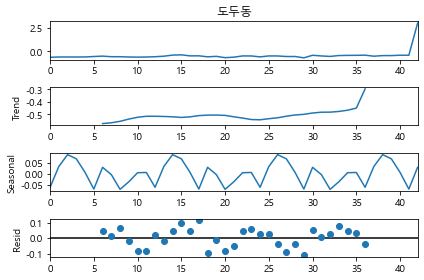

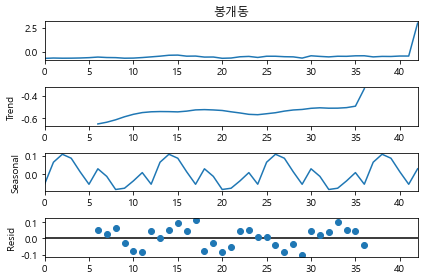

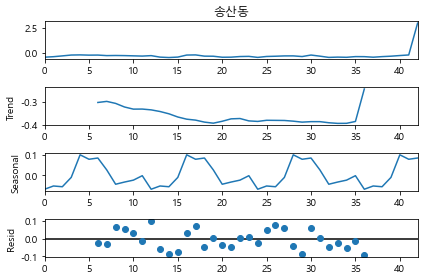

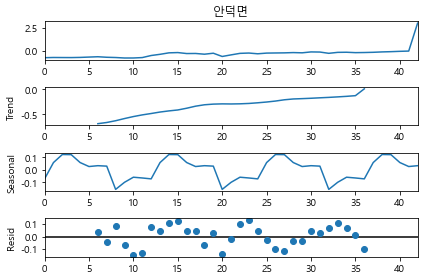

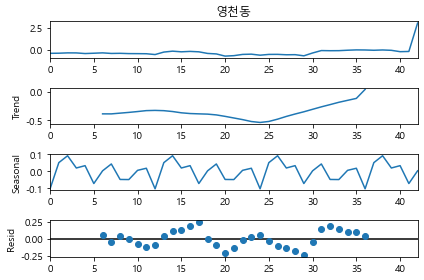

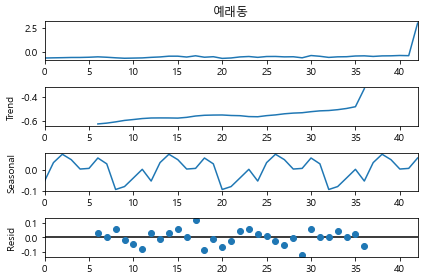

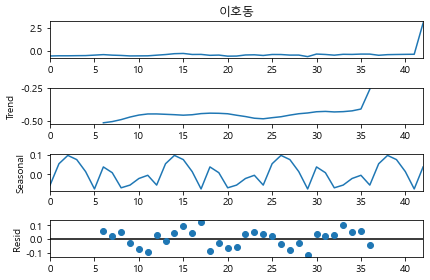

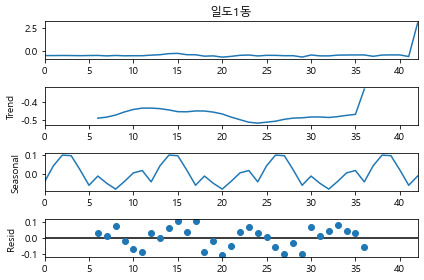

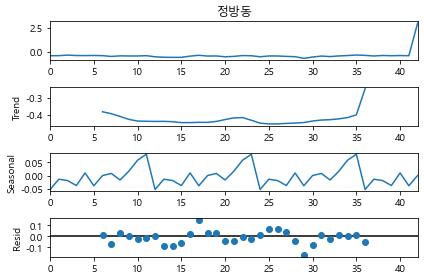

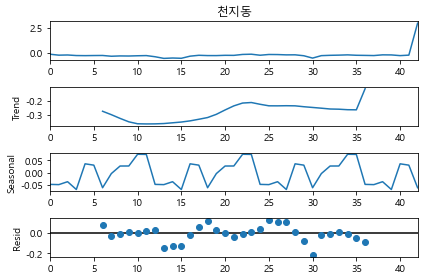

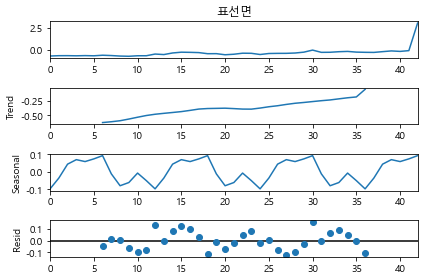

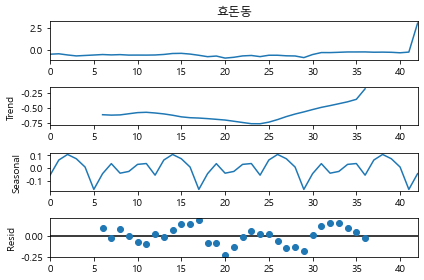

In [1440]:
seasonal(sy2, 3)

cluster number: 4


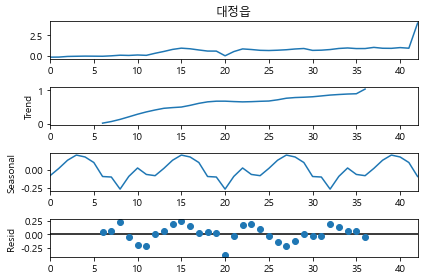

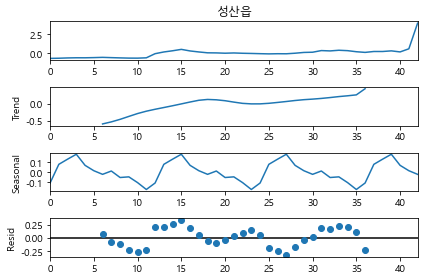

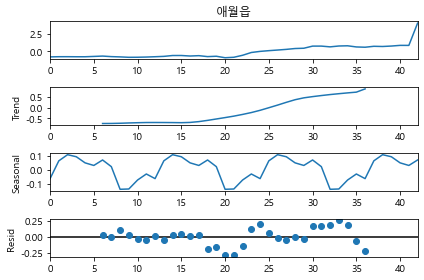

In [1441]:
seasonal(sy2, 4)

cluster number: 5


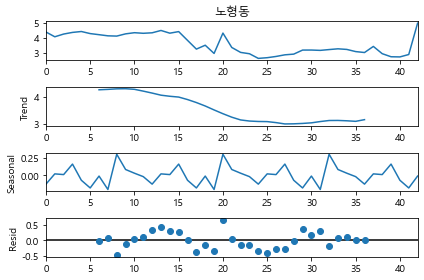

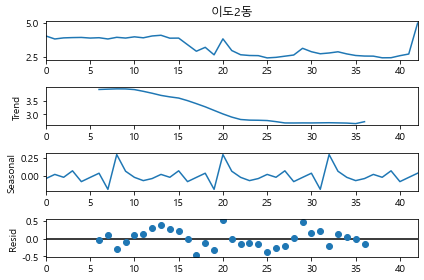

In [1442]:
seasonal(sy2, 5)

### 군집 No.5 시각화

- 합계 비교

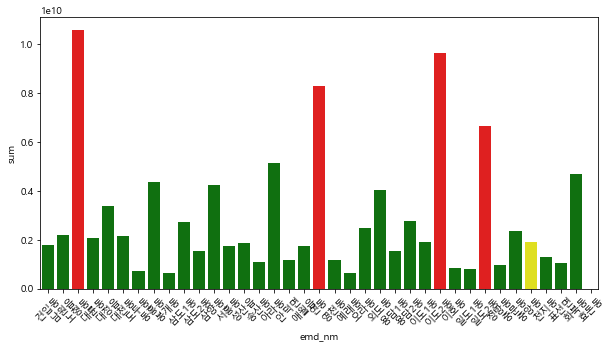

In [1443]:
pivot = total.drop(['구좌읍', '조천읍', '한경면', '한림읍', '알수없음'],1).T
sy3_pivot = pivot.reset_index().merge(sy3[['emd_nm','cluster']],on='emd_nm' ).set_index('emd_nm')
sy3_pivot['sum']=sy3_pivot[:-1].sum(axis=1)
fig,axes=plt.subplots(figsize=(10,5))
clrs = ['red' if (i==0) else 'green' if (i==1) else 'yellow' for i in sy3_pivot.cluster]
ax=sns.barplot(x=sy3_pivot.index,y=sy3_pivot['sum'],palette=clrs)
plt.xticks(rotation=45)

plt.show()

- 클러스터 plot

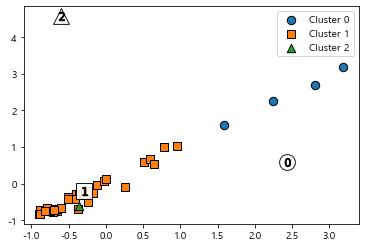

In [1444]:
sy3_sumDF = sy3[['emd_nm','총배출건수','총배출량','cluster']]
visualize_cluster_plot(sy3_km, sy3_sumDF, 'cluster', iscenter=True)

### 군집 No.6 시각화

- 합계 비교

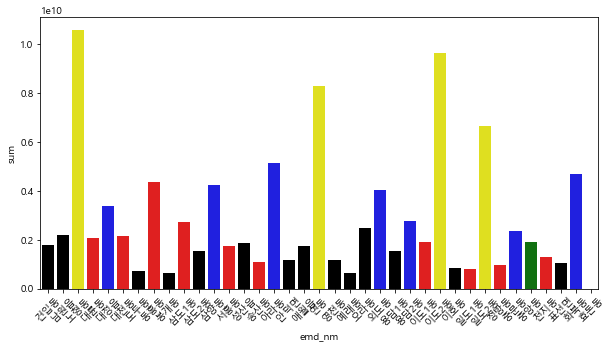

In [1445]:
jh1_pivot = pivot.reset_index().merge(jh1[['emd_nm','cluster']],on='emd_nm' ).set_index('emd_nm')
jh1_pivot['sum']=jh1_pivot[:-1].sum(axis=1)
fig,axes=plt.subplots(figsize=(10,5))
clrs = ['red' if (i==0) else 'green' if (i==1) else 'yellow' if (i==2) else 'blue' if (i==3) else 'black' for i in jh1_pivot.cluster]
ax=sns.barplot(x=jh1_pivot.index,y=jh1_pivot['sum'],palette=clrs)
plt.xticks(rotation=45)

plt.show()

- 클러스터 plot

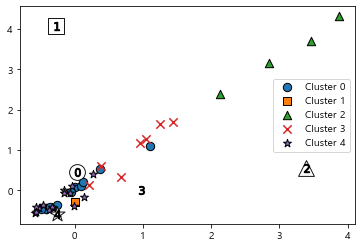

In [1446]:
jh1_sumDF = jh1
visualize_cluster_plot(jh1_km, jh1_sumDF, 'cluster', iscenter=True)

### 군집 No.7 시각화
: 군집 생성 과정에서 이미 진행된 시각화로 비교

### k-means 방법론에서 K별로 Silhouette Score 확인

In [1447]:
#Robust scailing 진행했던 군집 No.4와 동일 데이터
#k를 1~10까지 모두 군집화 진행


clusters_r = []
inertia_vals_r = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(2, 10, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, max_iter=100, random_state=0)
    models_labels = model.fit_predict(sy1_norm)

# append model to cluster list
    clusters_r.append(model)
    inertia_vals_r.append(model.inertia_)

In [1448]:
for i in range(3,8,1):
    
    print("---------------------------------------")
    print("실루엣 스코어 확인 (1에 가까울수록 적절한 군집)")
    print(clusters_r[i])
    print("Silhouette score:", silhouette_score(sy1_norm,clusters_r[i].predict(sy1_norm)))
    
# 군집 수가 6개일때 가장 1에 가까움

---------------------------------------
실루엣 스코어 확인 (1에 가까울수록 적절한 군집)
KMeans(max_iter=100, n_clusters=5, random_state=0)
Silhouette score: 0.5747261313817439
---------------------------------------
실루엣 스코어 확인 (1에 가까울수록 적절한 군집)
KMeans(max_iter=100, n_clusters=6, random_state=0)
Silhouette score: 0.5907655633515102
---------------------------------------
실루엣 스코어 확인 (1에 가까울수록 적절한 군집)
KMeans(max_iter=100, n_clusters=7, random_state=0)
Silhouette score: 0.5218138070523846
---------------------------------------
실루엣 스코어 확인 (1에 가까울수록 적절한 군집)
KMeans(max_iter=100, random_state=0)
Silhouette score: 0.5173611534674099
---------------------------------------
실루엣 스코어 확인 (1에 가까울수록 적절한 군집)
KMeans(max_iter=100, n_clusters=9, random_state=0)
Silhouette score: 0.48997951870902334


In [1449]:
#실루엣 스코어 눈으로 확인하는 방법

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

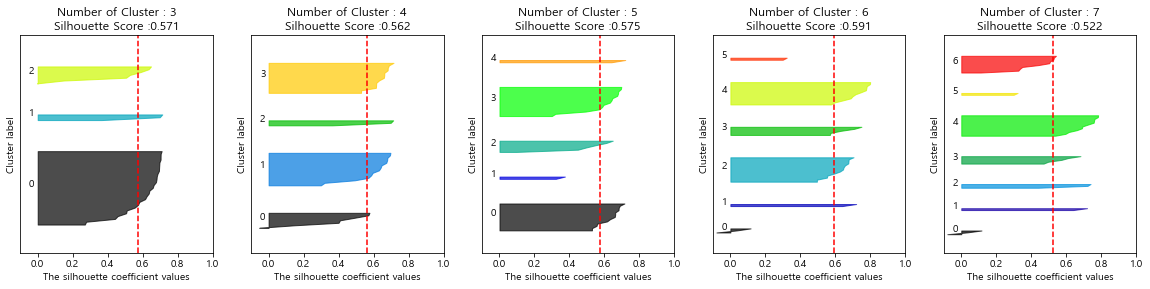

In [1450]:
# 군집 수가 6일때가 1에 가장 가까움 (빨간선), 이 때의 silhouette score은 0591로 가장 높음
visualize_silhouette( [3, 4, 5, 6, 7],sy1_norm)

## 결론

- 시각화 비교를 통해 robust scaling을 진행한 군집이 그렇지 않은 군집에 비해 군집의 합계 그래프가 군집별로 명확히 구분되는 것을 확인
- silhouette score과 SSE 를 비교한 그래프에서 k=6일때 두 그래프가 일치함
- 직접적인 silhouette score 수치와 시각화된 그래프를 보면 k=6일때 score이 가장 1에 가까움

### <span style = 'color:darkcyan'>따라서 위 결과를 종합적으로 고려하여 Robust Scaling을 진행하고 silhouette score 방법론으로 k=6일때의 군집 분석 방법을 사용하여 앞으로의 분석을 진행하기로 함 (군집 No.4)</span>

## Random State를 고정하지 않아 발생한 문제
- Kmeans 군집화를 진행할 때 Random State를 통일하여 지정하지 않았고 이로 인해 파일을 실행 할때마다, 또는 기기마다 실행 결과가 달라지는 결과를 얻음
=> <span style = 'color:darkcyan'>**팀원 중 한 명의 군집 No.4 스케일링 실행 결과를 기준**</span> 으로 clustering을 진행하였고 결과는 다음과 같다. (capture 첨부, ipynb 파일에서 실행 결과를 Ctrl+v)

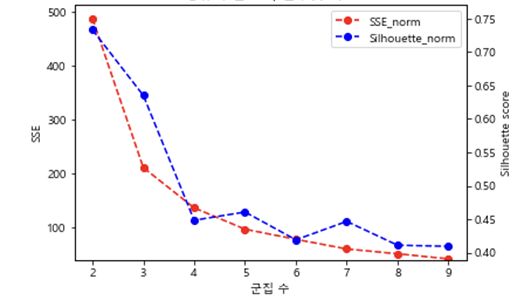

#####  ipynb 파일에서 실행 결과를 Ctrl+v)

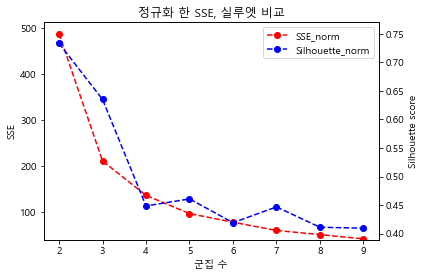

In [137]:
# 군집 수에 따른 SSE와 Silhouette score 시각화
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() #X축 공유해서 두 장이 합쳐진다.

line1 = ax1.plot(np.arange(2,10), wssn, 'ro--', label='SSE_norm')
line2 = ax2.plot(np.arange(2,10), sisn, 'bo--', label='Silhouette_norm') 

ax1.set_ylim(wssn.min()*0.95, wssn.max()*1.05)
ax2.set_ylim(sisn.min()*0.95, sisn.max()*1.05)

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.title('정규화 한 SSE, 실루엣 비교') # 정규화: 오타 -> Robust Scaling
plt.legend(lines, labels)
plt.show()

In [138]:
sy2_km=KMeans(n_clusters=6 )
km = sy2_km.fit(sy1_norm)

In [139]:
sy1_norm['cluster_km']=km.labels_
sy1_norm['cluster_km']=sy1_norm['cluster_km'].astype('category')

sy1_norm.cluster_km.value_counts()

0    14
3    12
2     5
1     2
4     2
5     2
Name: cluster_km, dtype: int64

In [140]:
sy2 = sy1_norm

In [143]:
for i in range(0,6) :
    print( i , sy2.reset_index().query('cluster_km == @i ').emd_nm )
    print('==============================')

0 6      도두동
8      봉개동
10    삼도2동
14     송산동
16     안덕면
19     영천동
20     예래동
23    용담1동
27     이호동
28    일도1동
30     정방동
33     천지동
34     표선면
36     효돈동
Name: emd_nm, dtype: object
1 18      연동
29    일도2동
Name: emd_nm, dtype: object
2 7     동홍동
11    삼양동
15    아라동
22    외도동
35    화북동
Name: emd_nm, dtype: object
3 0      건입동
1      남원읍
3      대륜동
4      대정읍
5      대천동
9     삼도1동
12     서홍동
21     오라동
24    용담2동
25    이도1동
31     중문동
32     중앙동
Name: emd_nm, dtype: object
4 13    성산읍
17    애월읍
Name: emd_nm, dtype: object
5 2      노형동
26    이도2동
Name: emd_nm, dtype: object


In [3]:
#최종 clustering 결과

cluster0=['도두동','봉개동','삼도2동','송산동','안덕면','영천동','예래동','용담1동','이호동','일도1동','정방동','천지동','표선면','효돈동']
cluster1=['연동','일도2동']
cluster2=['동홍동','삼양동','아라동','외도동','화북동']
cluster3=['건입동','남원읍','대륜동','대정읍','대천동','삼도1동','서홍동','오라동','용담2동','이도1동','중문동','중앙동']
cluster4=['성산읍','애월읍']
cluster5=['노형동','이도2동']
cluster6=["구좌읍","조천읍","한경면","한림읍","알수없음"]